In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import iqr

#### `Descriptive and inferential statistics`
Statistics can be used to answer lots of different types of questions, but being able to identify which type of statistics is needed is essential to drawing accurate conclusions. In this exercise, you'll sharpen your skills by identifying which type is needed to answer each question.

- Identify which questions can be answered with descriptive statistics and which questions can be answered with inferential statistics.
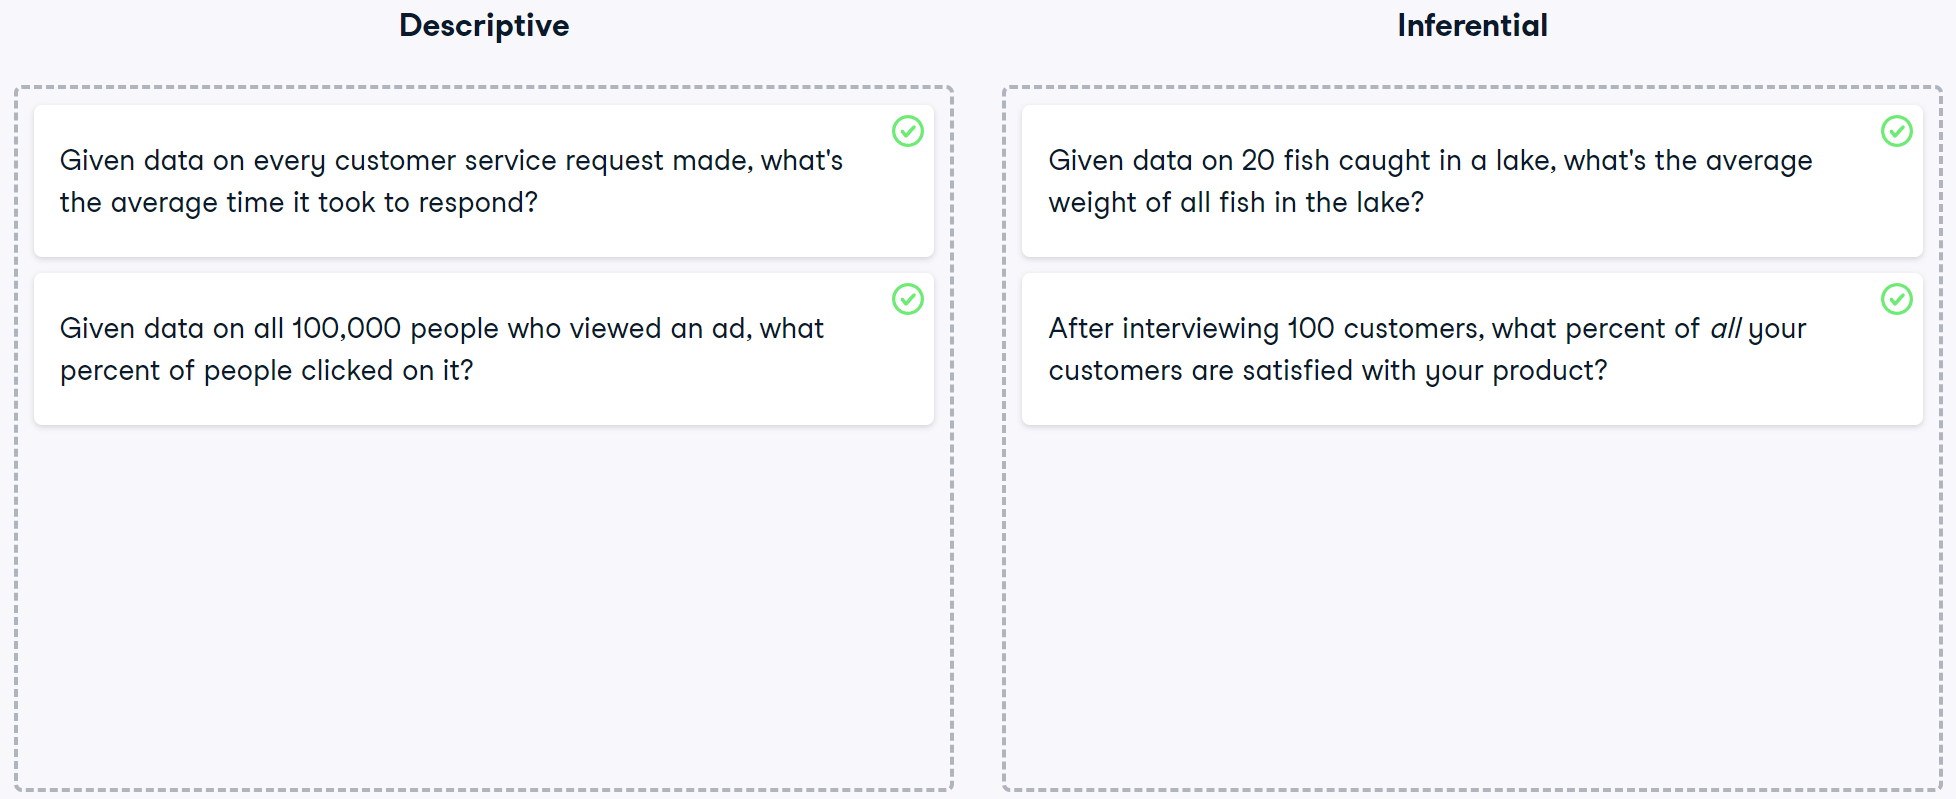

#### `Data type classification`
In the video, you learned about two main types of data: numeric and categorical. Numeric variables can be classified as either discrete or continuous, and categorical variables can be classified as either nominal or ordinal. These characteristics of a variable determine which ways of summarizing your data will work best.

- Map each variable to its data type by dragging each item and dropping it into the correct data type.
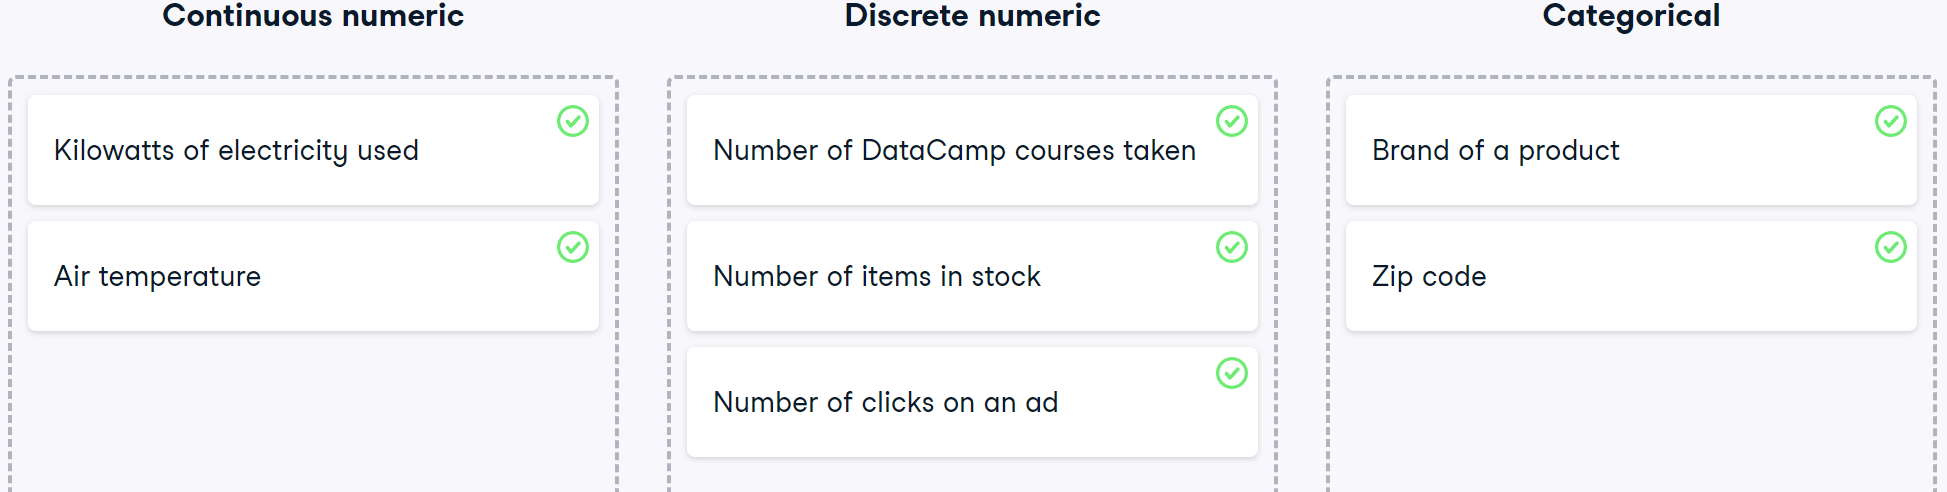

#### `Mean and median`
In this chapter, you'll be working with the 2018 Food Carbon Footprint Index from nu3. The __food_consumption__ dataset contains information about the kilograms of food consumed per person per year in each country in each food category __(consumption)__ as well as information about the carbon footprint of that food category __(co2_emissions)__ measured in kilograms of carbon dioxide, or CO2, per person per year in each country.

In this exercise, you'll compute measures of center to compare food consumption in the US and Belgium using your __pandas__ and __numpy__ skills.

__pandas__ is imported __as__ pd for you and __food_consumption__ is pre-loaded.

In [3]:
food_consumption = pd.read_csv('../../datasets/food_consumption.csv')
food_consumption

,Unnamed: 0,country,food_category,consumption,co2_emission
0,1,Argentina,pork,10.51,37.20
1,2,Argentina,poultry,38.66,41.53
2,3,Argentina,beef,55.48,1712.00
3,4,Argentina,lamb_goat,1.56,54.63
4,5,Argentina,fish,4.36,6.96
...,...,...,...,...,...
1425,1426,Bangladesh,dairy,21.91,31.21
1426,1427,Bangladesh,wheat,17.47,3.33
1427,1428,Bangladesh,rice,171.73,219.76
1428,1429,Bangladesh,soybeans,0.61,0.27


1. Import numpy with the alias np.
Create two DataFrames: one that holds the rows of __food_consumption__ for __'Belgium'__ and another that holds rows for __'USA'__. Call these __be_consumption__ and __usa_consumption__.
Calculate the mean and median of kilograms of food consumed per person per year for both countries.

2. Subset __food_consumption__ for rows with data about Belgium and the USA.
Group the subsetted data by __country__ and select only the __consumption__ column.
Calculate the mean and median of the kilograms of food consumed per person per year in each country using __.agg()__.

In [4]:
# # Import numpy with alias np
# import numpy as np

# # Filter for Belgium
# be_consumption = food_consumption[food_consumption['country'] == 'Belgium']['consumption']
# # Filter for USA
# usa_consumption = food_consumption[food_consumption['country'] == 'USA']['consumption']

# # Calculate mean and median consumption in Belgium
# print(be_consumption.median())
# print(be_consumption.mean())

# # Calculate mean and median consumption in USA
# print(usa_consumption.median())
# print(usa_consumption.mean())


# Import numpy with alias np
import numpy as np

# Filter for Belgium and create DataFrame
be_consumption = food_consumption[food_consumption['country'] == 'Belgium'].copy()

# Filter for USA and create DataFrame
usa_consumption = food_consumption[food_consumption['country'] == 'USA'].copy()

# Calculate mean and median consumption in Belgium
be_mean = be_consumption['consumption'].mean()
be_median = be_consumption['consumption'].median()
print("Belgium Mean Consumption:", be_mean)
print("Belgium Median Consumption:", be_median)

# Calculate mean and median consumption in USA
usa_mean = usa_consumption['consumption'].mean()
usa_median = usa_consumption['consumption'].median()
print("USA Mean Consumption:", usa_mean)
print("USA Median Consumption:", usa_median)

Belgium Mean Consumption: 42.13272727272727
Belgium Median Consumption: 12.59
USA Mean Consumption: 44.650000000000006
USA Median Consumption: 14.58


In [5]:
# Import numpy as np
import numpy as np

# Subset for Belgium and USA only
be_and_usa = food_consumption[(food_consumption['country']=='Belgium') | (food_consumption['country']=='USA')]

# Group by country, select consumption column, and compute mean and median
print(be_and_usa.groupby('country')['consumption'].agg([np.mean, np.median]))

              mean  median
country                   
Belgium  42.132727   12.59
USA      44.650000   14.58


C:\Users\Albert\AppData\Local\Temp\ipykernel_20096\3946114739.py:8: FutureWarning: The provided callable <function mean at 0x00000194CA35A7A0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  print(be_and_usa.groupby('country')['consumption'].agg([np.mean, np.median]))
C:\Users\Albert\AppData\Local\Temp\ipykernel_20096\3946114739.py:8: FutureWarning: The provided callable <function median at 0x00000194E04B34C0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  print(be_and_usa.groupby('country')['consumption'].agg([np.mean, np.median]))


#### `Mean vs. median`
In the video, you learned that the mean is the sum of all the data points divided by the total number of data points, and the median is the middle value of the dataset where 50% of the data is less than the median, and 50% of the data is greater than the median. In this exercise, you'll compare these two measures of center.

pandas is loaded as pd, numpy is loaded as np, and __food_consumption__ is available.

1. Import __matplotlib.pyplot__ with the alias __plt__.
2. Subset __food_consumption__ to get the rows where __food_category__ is __'rice'__.
3. Create a histogram of __co2_emission__ for __rice__ and show the plot.

In [6]:
print(food_consumption.head())

   Unnamed: 0    country food_category  consumption  co2_emission
0           1  Argentina          pork        10.51         37.20
1           2  Argentina       poultry        38.66         41.53
2           3  Argentina          beef        55.48       1712.00
3           4  Argentina     lamb_goat         1.56         54.63
4           5  Argentina          fish         4.36          6.96


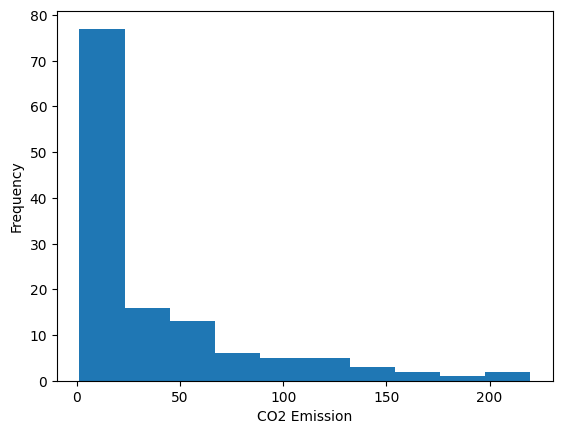

In [7]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt 

# Subset for food_category equals rice
rice_consumption = food_consumption[food_consumption['food_category'] == 'rice']

# Histogram of co2_emission for rice and show plot
plt.hist(rice_consumption['co2_emission'])
plt.xlabel('CO2 Emission')
plt.ylabel('Frequency')
plt.show()

#### `Question`
Take a look at the histogram you just created of different countries' CO2 emissions for rice. Which of the following terms best describes the shape of the data?

#### `Possible answers`
- No skew
- Left-skewed
- `Right-skewed` The mean is substantially higher than the median since it's being pulled up by the high values over 100 kg/person/year.

- Use .agg() to calculate the mean and median of co2_emission for rice.

In [8]:
# Subset for food_category equals rice
rice_consumption = food_consumption[food_consumption['food_category'] == 'rice']

# Calculate mean and median of co2_emission with .agg()
print(rice_consumption['co2_emission'].agg([np.mean, np.median]))

mean      37.591615
median    15.200000
Name: co2_emission, dtype: float64


C:\Users\Albert\AppData\Local\Temp\ipykernel_20096\4271522359.py:5: FutureWarning: The provided callable <function mean at 0x00000194CA35A7A0> is currently using Series.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  print(rice_consumption['co2_emission'].agg([np.mean, np.median]))
C:\Users\Albert\AppData\Local\Temp\ipykernel_20096\4271522359.py:5: FutureWarning: The provided callable <function median at 0x00000194E04B34C0> is currently using Series.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  print(rice_consumption['co2_emission'].agg([np.mean, np.median]))


#### Question
Given the skew of this data, what measure of central tendency best summarizes the kilograms of CO2 emissions per person per year for rice?

#### Possible answers
- Mean
- Median
- Both mean and median

#### `Quartiles, quantiles, and quintiles`
Quantiles are a great way of summarizing numerical data since they can be used to measure center and spread, as well as to get a sense of where a data point stands in relation to the rest of the data set. For example, you might want to give a discount to the 10% most active users on a website.

In this exercise, you'll calculate quartiles, quintiles, and deciles, which split up a dataset into 4, 5, and 10 pieces, respectively.

Both pandas as pd and numpy as np are loaded and __food_consumption__ is available.

1. Calculate the ___quartiles___ of the __co2_emission__ column of __food_consumption__.
2. Calculate the six quantiles that split up the data into 5 pieces (quintiles) of the __co2_emission__ column of __food_consumption__.
3. Calculate the eleven quantiles of __co2_emission__ that split up the data into ten pieces (deciles).

In [9]:
print(np.quantile(food_consumption['co2_emission'], [0, 0.25, 0.5, 0.75, 1]))

[   0.        5.21     16.53     62.5975 1712.    ]


In [10]:
# Calculate the quintiles of co2_emission
print(np.quantile(food_consumption['co2_emission'], [0, 0.2, 0.4, 0.6, 0.8, 1]))

[   0.       3.54    11.026   25.59    99.978 1712.   ]


In [11]:
print(np.quantile(food_consumption['co2_emission'], [i/10 for i in range(11)]))

[0.00000e+00 6.68000e-01 3.54000e+00 7.04000e+00 1.10260e+01 1.65300e+01
 2.55900e+01 4.42710e+01 9.99780e+01 2.03629e+02 1.71200e+03]


#### `Variance and standard deviation`
Variance and standard deviation are two of the most common ways to measure the spread of a variable, and you'll practice calculating these in this exercise. Spread is important since it can help inform expectations. For example, if a salesperson sells a mean of 20 products a day, but has a standard deviation of 10 products, there will probably be days where they sell 40 products, but also days where they only sell one or two. Information like this is important, especially when making predictions.

Both pandas as pd and numpy as np are loaded, and food_consumption is available.

1. Calculate the __variance__ and __standard deviation__ of __co2_emission__ for each __food_category__ by grouping and aggregating.
2. Import matplotlib.pyplot with alias plt.
3. Create a histogram of __co2_emission__ for the __beef__ __food_category__ and show the plot.
4. Create a histogram of __co2_emission__ for the __eggs__ __food_category__ and show the plot.

In [12]:
# print(food_consumption[food_consumption['food_category'] == 'beef'])

C:\Users\Albert\AppData\Local\Temp\ipykernel_20096\993219589.py:2: FutureWarning: The provided callable <function var at 0x00000194CA35AA20> is currently using SeriesGroupBy.var. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "var" instead.
  print(food_consumption.groupby('food_category')['co2_emission'].agg([np.var, np.std]))
C:\Users\Albert\AppData\Local\Temp\ipykernel_20096\993219589.py:2: FutureWarning: The provided callable <function std at 0x00000194CA35A8E0> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  print(food_consumption.groupby('food_category')['co2_emission'].agg([np.var, np.std]))


                        var         std
food_category                          
beef           88748.408132  297.906710
dairy          17671.891985  132.935669
eggs              21.371819    4.622966
fish             921.637349   30.358481
lamb_goat      16475.518363  128.356996
nuts              35.639652    5.969895
pork            3094.963537   55.632396
poultry          245.026801   15.653332
rice            2281.376243   47.763754
soybeans           0.879882    0.938020
wheat             71.023937    8.427570


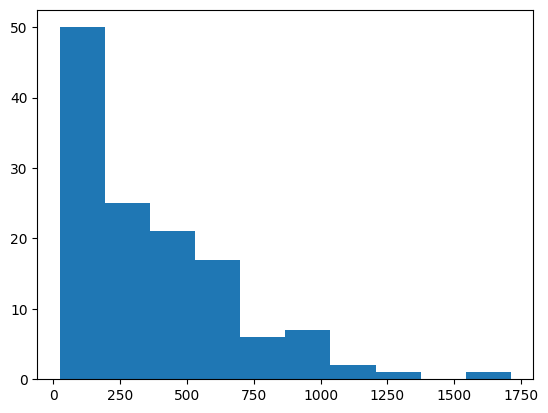

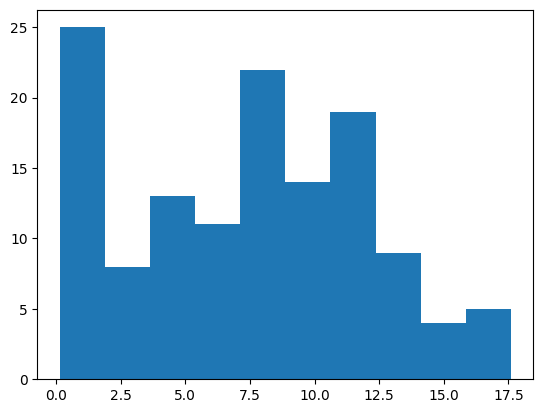

In [13]:
# Print variance and sd of co2_emission for each food_category
print(food_consumption.groupby('food_category')['co2_emission'].agg([np.var, np.std]))

# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Create histogram of co2_emission for food_category 'beef'
plt.hist(food_consumption[food_consumption['food_category'] == 'beef']['co2_emission'])
# Show plot
plt.show()

# Create histogram of co2_emission for food_category 'eggs'
plt.hist(food_consumption[food_consumption['food_category'] == 'eggs']['co2_emission'])
# Show plot
plt.show()

#### `Finding outliers using IQR`
Outliers can have big effects on statistics like mean, as well as statistics that rely on the mean, such as variance and standard deviation. Interquartile range, or IQR, is another way of measuring spread that's less influenced by outliers. IQR is also often used to find outliers. If a value is less than ___Q1 - 1.5 x IQR___ or greater than ___Q3 + 1.5 x IQR___, it's considered an outlier. In fact, this is how the lengths of the whiskers in a matplotlib box plot are calculated.
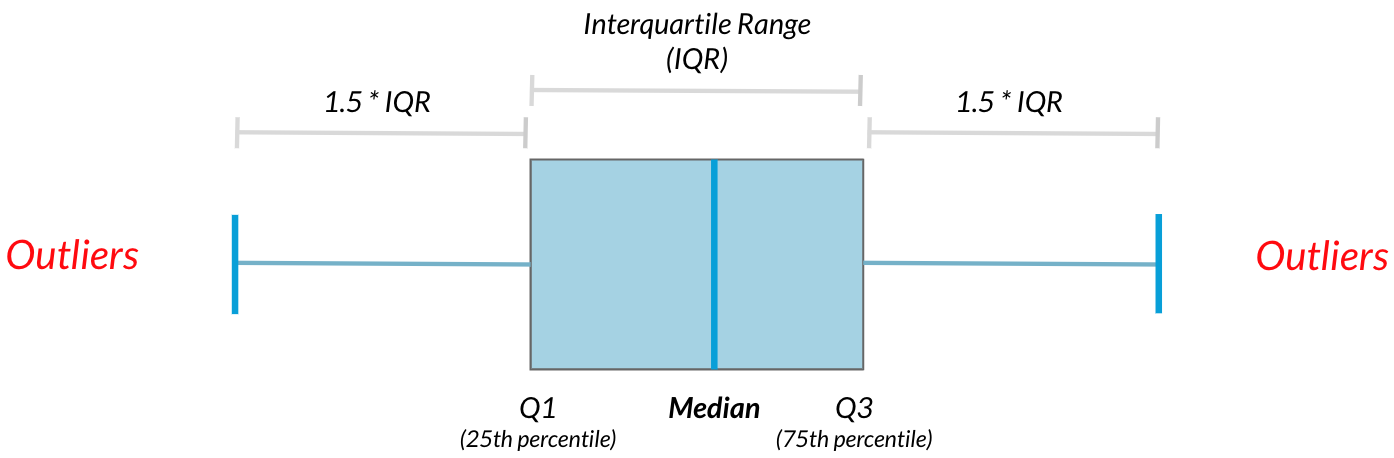
In this exercise, you'll calculate __IQR__ and use it to find some outliers. __pandas__ as __pd__ and __numpy__ as __np__ are loaded and __food_consumption__ is available.

Calculate the total __co2_emission__ per country by grouping by country and taking the sum of __co2_emission__. Store the resulting DataFrame as __emissions_by_country__.

In [14]:
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emission'].sum()

print(emissions_by_country)

country
Albania      1777.85
Algeria       707.88
Angola        412.99
Argentina    2172.40
Armenia      1109.93
              ...   
Uruguay      1634.91
Venezuela    1104.10
Vietnam       641.51
Zambia        225.30
Zimbabwe      350.33
Name: co2_emission, Length: 130, dtype: float64


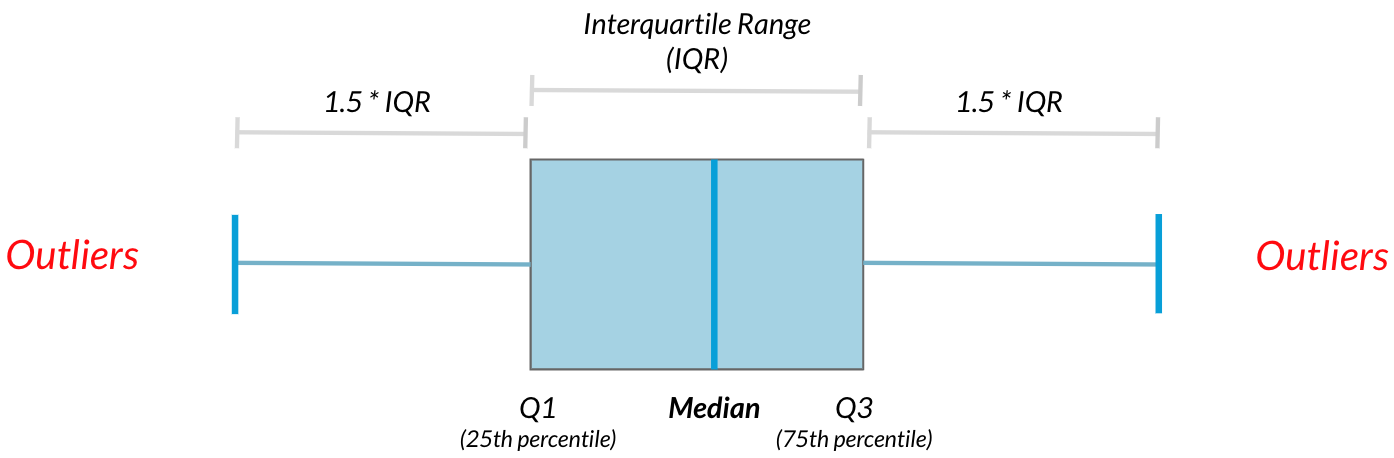
- Compute the first and third quartiles of __emissions_by_country__ and store these as q1 and q3.
- Calculate the interquartile range of __emissions_by_country__ and store it as iqr.

In [22]:
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emission'].sum()
emissions_by_country
# Compute the first and third quartiles and IQR of emissions_by_country
q1 = np.quantile(emissions_by_country, 0.25)
q3 = np.quantile(emissions_by_country, 0.75)
iqr = q3 - q1

664.4925000000001

- Calculate the lower and upper cutoffs for outliers of __emissions_by_country__, and store these as __lower__ and __upper__.

In [23]:
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emission'].sum()

# Compute the first and third quantiles and IQR of emissions_by_country
q1 = np.quantile(emissions_by_country, 0.25)
q3 = np.quantile(emissions_by_country, 0.75)
iqr = q3 - q1

# Calculate the lower and upper cutoffs for outliers
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

- Subset __emissions_by_country__ to get countries with a total emission __greater than__ the upper cutoff or a total emission __less than__ the lower cutoff.

In [25]:
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emission'].sum()

# Compute the first and third quantiles and IQR of emissions_by_country
q1 = np.quantile(emissions_by_country, 0.25)
q3 = np.quantile(emissions_by_country, 0.75)
iqr = q3 - q1

# Calculate the lower and upper cutoffs for outliers
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

# Subset emissions_by_country to find outliers
outliers = emissions_by_country[(emissions_by_country < lower) | (emissions_by_country > upper)]
print(outliers)

country
Argentina    2172.4
Name: co2_emission, dtype: float64
